In [1]:
#importing libraries
import pandas as pd
import numpy as np
#For plotting
import matplotlib.pyplot as plt
from shapely.geometry import LineString
import csv

In [2]:
pip install plotly

In [3]:
!pip install plotly dash jupyter-dash

  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 41.7 MB/s eta 0:00:00
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)


In [4]:
#importing libraries
import plotly.graph_objects as go
from math import sqrt
from dash import Dash, dcc, html, Input, Output
from jupyter_dash import JupyterDash

In [24]:
#Reading the dataset
input_file_name=input("Enter the input file path: ")
data1=pd.read_csv(input_file_name,names=['ppm','Intensities'])
data1.reset_index(drop=True, inplace=True)
data1

Enter the input file path: /content/final_data.csv


,ppm,Intensities
0,-5.000000,68900000.0
1,-4.857143,69900000.0
2,-4.714286,69000000.0
3,-4.571429,69400000.0
4,-4.428571,69500000.0
...,...,...
101,9.428571,68900000.0
102,9.571429,69100000.0
103,9.714286,68800000.0
104,9.857143,69100000.0


In [25]:
#Use just in case normalisation of intensities is required (uncomment it if normalisation is required)

#avg=[]
#for i in range(len(data1["Intensities"])-1,len(data1["Intensities"])-11,-1):
#  avg+=[data1["Intensities"][i]]
#data1["Intensities"]=data1["Intensities"]/np.average(avg)

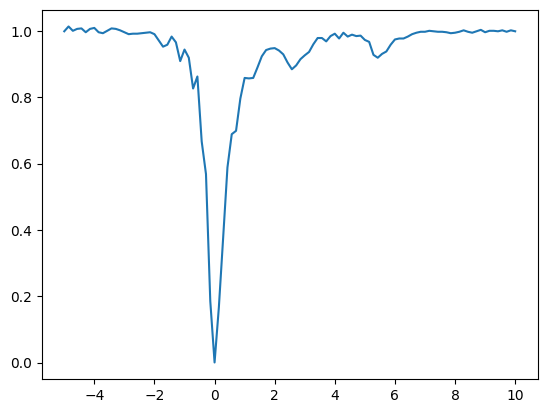

In [26]:
plt.plot(data1["ppm"],data1["Intensities"])

In [27]:
#defining the necessary functions needed for three pool curve fitting

def peak(data,Intensity):
  I=data[Intensity]
  ppm=data["ppm"]
  positions=[]
  indices=[]
  Inten={}
  for i in range(1,len(I)-1):
    if I[i-1]>=I[i] and I[i]<=I[i+1]:
      positions+=[data["ppm"][i]]
      indices+=[i]
      Inten[data["ppm"][i]]=I[i]
  for i in range(2, len(I)-2):
    if I[i-2]>=I[i] and I[i]<=I[i+2]:
      if data["ppm"][i] not in positions:
        positions+=[data["ppm"][i]]
        indices+=[i]
        Inten[data["ppm"][i]]=I[i]
  positions.sort()
  indices.sort()
  return positions,indices,Inten

def data_plot(data,I):
  positions=peak(data,I)[0]
  fig = go.Figure()
  fig.add_trace(go.Scatter(x=data["ppm"], y=data[I], mode='lines+markers'))
  for i in range(len(positions)):
    lim_0=0
    lim_1=1.1
    l_y=[]
    l_x=[]
    while lim_0<=lim_1:
      l_y+=[lim_0]
      l_x+=[positions[i]]
      lim_0+=0.05
    #print(l_y)
    fig.add_trace(go.Scatter(x=l_x, y=l_y, mode='lines+markers',name=str(i)))
  fig.show()
  return positions

def interactive_plot(data,peak_positions,I):
  x=data["ppm"]
  y=data[I]
  fig = go.Figure()
  fig.add_trace(go.Scatter(x=x, y=y, mode='lines+markers'))
  fig.add_shape(
      type="line",
      x0=peak_positions[0],
      x1=peak_positions[0],
      y0=min(y),
      y1=max(y),
      line=dict(color="Green", width=2, dash="dash"),
      name='Vertical Line')

  fig.add_shape(
      type="line",
      x0=peak_positions[1],
      x1=peak_positions[1],
      y0=min(y),
      y1=max(y),
      line=dict(color="Green", width=2, dash="dash"),
      name='Vertical Line')

  fig.add_shape(
      type="line",
      x0=peak_positions[2],
      x1=peak_positions[2],
      y0=min(y),
      y1=max(y),
      line=dict(color="Green", width=2, dash="dash"),
      name='Vertical Line')

  fig.add_shape(
      type="line",
      x0=peak_positions[3],
      x1=peak_positions[3],
      y0=min(y),
      y1=max(y),
      line=dict(color="Green", width=2, dash="dash"),
      name='Vertical Line')

  fig.update_layout(
      title='Intensities vs offset graph',
      xaxis_title='offset',
      yaxis_title='Intensities')

  fig.show()

In [28]:
#function for getting the tracer (indexes) for the peaks
data_plot_1=data_plot(data1,"Intensities")

In [29]:
#defining the three peak positions (x1,x2 and x3)/ Offset values
p1=int(input("enter the tracer for x1: "))
p2=int(input("enter the tracer for x2: "))
p3=int(input("enter the tracer for x3: "))
p4=int(input("enter the tracer for x4: "))
x1=peak(data1,"Intensities")[0][p1]
x2=peak(data1,"Intensities")[0][p2]
x3=peak(data1,"Intensities")[0][p3]
x4=peak(data1,"Intensities")[0][p4]
print(x1,x2,x3,x4)

enter the tracer for x1: 11
enter the tracer for x2: 14
enter the tracer for x3: 15
enter the tracer for x4: 22
0.0 1.2857142857142858 2.571428571428572 5.428571428571429


In [30]:
peak_positions_1=[data_plot_1[p1],data_plot_1[p2],data_plot_1[p3],data_plot_1[p4]]
peak_positions_1

[0.0, 1.2857142857142858, 2.571428571428572, 5.428571428571429]

In [31]:
#plot with the marked peaks
interactive_plot(data1,peak_positions_1,"Intensities")

In [32]:
#Calculating the amplitdes for the peaks
avg_=[]
for i in range(len(data1["Intensities"])-1,len(data1["Intensities"])-11,-1):
  avg_+=[data1["Intensities"][i]]

avg2=np.average(avg_)
avg2

dic=peak(data1,"Intensities")[2]
A=[]
for i in peak_positions_1:

  A+=[-dic[i]+avg2]
A

[0.9996364486658933,
 0.14153132250580047,
 0.11542923433874708,
 0.08062645011600933]

In [33]:
#following code only works once, restartsession whenever you need to use it again
#This is the code that needed for calculating the fwhm (Full Width of Half Maxima)
#Click on 2 points in the images where a query for calculating the distance between 2 points is present (Chose any of the last two images)
#click on any points for which you need to calculate the distance between them

data64=data1
app = JupyterDash(__name__)
i1=p1
i2=p2
i3=p3
i4=p4
I="Intensities"
x=data64["ppm"]
y=data64["Intensities"]
i=min(x)
j=max(x)
x_coord=[]
base_line=[]
y_coord1=[]
y_coord2=[]
y_coord3=[]
y_coord4=[]
while i<=j:
  x_coord+=[i]
  base_line+=[y.iloc[len(y)-1]]
  y_coord1+=[((y.iloc[len(y)-1])+data64[I][peak(data64,I)[1][i1]])/2]
  y_coord2+=[((y.iloc[len(y)-1])+data64[I][peak(data64,I)[1][i2]])/2]
  y_coord3+=[((y.iloc[len(y)-1])+data64[I][peak(data64,I)[1][i3]])/2]
  y_coord4+=[((y.iloc[len(y)-1])+data64[I][peak(data64,I)[1][i4]])/2]
  i+=(1/50)

k=min(y)
peak_1x=[]
peak_2x=[]
peak_3x=[]
peak_4x=[]
peak_y=[]
while k<=1.05:
  peak_y+=[k]
  peak_1x+=[data64["ppm"][peak(data64,I)[1][i1]]]
  peak_2x+=[data64["ppm"][peak(data64,I)[1][i2]]]
  peak_3x+=[data64["ppm"][peak(data64,I)[1][i3]]]
  peak_4x+=[data64["ppm"][peak(data64,I)[1][i4]]]
  k+=(1/200)

fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=y, mode='lines+markers'))
fig.add_trace(go.Scatter(x=x_coord, y=base_line, mode='lines+markers'))
fig.add_trace(go.Scatter(x=x_coord, y=y_coord1, mode='lines+markers'))
fig.add_trace(go.Scatter(x=x_coord, y=y_coord2, mode='lines+markers'))
fig.add_trace(go.Scatter(x=x_coord, y=y_coord3, mode='lines+markers'))
fig.add_trace(go.Scatter(x=x_coord, y=y_coord4, mode='lines+markers'))
fig.add_trace(go.Scatter(x=peak_1x, y=peak_y, mode='lines+markers'))
fig.add_trace(go.Scatter(x=peak_2x, y=peak_y, mode='lines+markers'))
fig.add_trace(go.Scatter(x=peak_3x, y=peak_y, mode='lines+markers'))
fig.add_trace(go.Scatter(x=peak_4x, y=peak_y, mode='lines+markers'))
fig.update_layout(title='Intensities vs offset graph',xaxis_title='ppm',yaxis_title='Intensities')
fig.show()

# Define the layout of the app
app.layout = html.Div([
    dcc.Graph(id='scatter-plot', figure=fig),
    html.Div(id='output')
])

# Initialize a list to store clicked points
clicked_points = []

@app.callback(
    Output('output', 'children'),
    Input('scatter-plot', 'clickData')
)
def display_click_data(clickData):
    global clicked_points
    if clickData:
        point = clickData['points'][0]
        clicked_points.append((point['x'], point['y']))
        if len(clicked_points) == 2:
            x0, y0 = clicked_points[0]
            x1, y1 = clicked_points[1]
            distance = sqrt((x1 - x0) ** 2 + (y1 - y0) ** 2)
            clicked_points = []  # Reset after calculating the distance
            return f'Distance between points: {distance:.2f}'
    return "Click on two points to calculate the distance."

# Run the Dash app in Colab
app.run_server(mode='inline',port=8050)

/usr/local/lib/python3.10/dist-packages/dash/dash.py:556: UserWarning:

JupyterDash is deprecated, use Dash instead.
See https://dash.plotly.com/dash-in-jupyter for more details.



<IPython.core.display.Javascript object>

In [34]:
R1=float(input("Enter fwhm1: "))
R2=float(input("Enter fwhm2: "))
R3=float(input("Enter fwhm3: "))
R4=float(input("Enter fwhm4: "))

Enter fwhm1: 0.62
Enter fwhm2: 0.62
Enter fwhm3: 1.04
Enter fwhm4: 0.7


In [35]:
def lorentzian(x,A,r,x1):
  L= (A*r)/(((x-x1)**2+r**2)*np.pi)
  return L

In [36]:
def bound(lower,upper,step):
  l=[]
  while lower<=upper:
    l+=[lower]
    lower+=step
  return l

def boundaries(A,r):
  r1=r/2
  B_A=bound(A-1.1,A+1.1,1/20)
  B_r=bound(r1-0.05,r1+0.05,1/40)
  return B_A,B_r

def error(data,A,r,off):
  x=data["ppm"]
  y=data["Intensities"]
  y_fit=lorentzian(x,A,r,off)
  error=0
  for i in range(len(x)):
    if x[i] == off:
      print(A,",",r,",",off,"   ",y_fit[i],"   ",y[i],"   ",(avg2-y_fit[i])-y[i])
      error+=((avg2-y_fit[i])-y[i])**2
  error1=np.sum(((avg2-y_fit)-(y))**2)
  return error,error1

def para(data,A,r,pe):
  x=data["ppm"]
  y=data["Intensities"]
  liste1=[]
  liste2=[]
  e={}
  val={}
  for i in range(len(A)):
    for j in range(len(r)):
      err=error(data,A[i],r[j],pe)
      liste1+=[err[0]]
      liste2+=[err[1]]
      e[err[0]]=err[1]
      val[err[1]]=[A[i],r[j],pe]
      #print(i,j,err[0],err[1],A[i],"\n")

  liste1.sort()
  listf1=liste1[0:10]
  listf2=[]
  for i in listf1:
    listf2+=[e[i]]
  mini=min(listf2)
  print(val[mini])
  for i in listf1:
    if e[i]==mini:
      print(i,mini)
  return val[mini]

In [37]:
print(A,R1,R2,R3,R4,x1,x2,x3,x4)

[0.9996364486658933, 0.14153132250580047, 0.11542923433874708, 0.08062645011600933] 0.62 0.62 1.04 0.7 0.0 1.2857142857142858 2.571428571428572 5.428571428571429


In [38]:
b=boundaries(A[0],R1)
p=para(data64,b[0],b[1],x1)
p

-0.1003635513341068 , 0.26 , 0.0     -0.12287196385446371     0.00036355133410672855     1.122508412520357
-0.1003635513341068 , 0.28500000000000003 , 0.0     -0.1120937214110897     0.00036355133410672855     1.111730170076983
-0.1003635513341068 , 0.31000000000000005 , 0.0     -0.10305390516825987     0.00036355133410672855     1.1026903538341533
-0.1003635513341068 , 0.3350000000000001 , 0.0     -0.09536331523033002     0.00036355133410672855     1.0949997638962232
-0.05036355133410679 , 0.26 , 0.0     -0.06165852420373473     0.00036355133410672855     1.061294972869628
-0.05036355133410679 , 0.28500000000000003 , 0.0     -0.056249881729722916     0.00036355133410672855     1.0558863303956163
-0.05036355133410679 , 0.31000000000000005 , 0.0     -0.051713600945067835     0.00036355133410672855     1.0513500496109611
-0.05036355133410679 , 0.3350000000000001 , 0.0     -0.04785437699394337     0.00036355133410672855     1.0474908256598368
-0.0003635513341067875 , 0.26 , 0.0     -0.000

[1.0496364486658936, 0.3350000000000001, 0.0]

In [39]:
x=data64["ppm"]
y=data64["Intensities"]
y_fit1=lorentzian(data64["ppm"],p[0],p[1],p[2])
fig=go.Figure()
fig.add_trace(go.Scatter(x=x, y=y, mode='markers',name="Data plot"))
#fig.add_trace(go.Scatter(x=x, y=y_fit, mode='markers',name="Data plot"))
fig.update_layout(title='Intensities vs offset graph',xaxis_title='offset',yaxis_title='Intensities')
fig.add_trace(go.Scatter(x=x, y=y[len(y)-1]-y_fit1, mode='lines',line_shape="spline",name="Fitted plot"))
fig.show()

In [40]:
b1=boundaries(A[1],R2)
p1=para(data64,b1[0],b1[1],x2)
p1

-0.9584686774941996 , 0.26 , 1.2857142857142858     -1.173423290938104     0.8584686774941995     1.3149546134439043
-0.9584686774941996 , 0.28500000000000003 , 1.2857142857142858     -1.0704914233119547     0.8584686774941995     1.2120227458177553
-0.9584686774941996 , 0.31000000000000005 , 1.2857142857142858     -0.9841614698190547     0.8584686774941995     1.125692792324855
-0.9584686774941996 , 0.3350000000000001 , 1.2857142857142858     -0.9107165840116627     0.8584686774941995     1.0522479065174632
-0.9084686774941996 , 0.26 , 1.2857142857142858     -1.1122098512873748     0.8584686774941995     1.2537411737931752
-0.9084686774941996 , 0.28500000000000003 , 1.2857142857142858     -1.0146475836305877     0.8584686774941995     1.1561789061363879
-0.9084686774941996 , 0.31000000000000005 , 1.2857142857142858     -0.9328211655958627     0.8584686774941995     1.0743524881016633
-0.9084686774941996 , 0.3350000000000001 , 1.2857142857142858     -0.863207645775276     0.85846867749

[0.19153132250580074, 0.3350000000000001, 1.2857142857142858]

In [41]:
y_fit2=lorentzian(data64["ppm"],p1[0],p1[1],p1[2])
fig=go.Figure()
fig.add_trace(go.Scatter(x=x, y=y, mode='markers',name="Data plot"))
#fig.add_trace(go.Scatter(x=x, y=y_fit, mode='markers',name="Data plot"))
fig.update_layout(title='Intensities vs offset graph',xaxis_title='offset',yaxis_title='Intensities')
fig.add_trace(go.Scatter(x=x, y=y[len(y)-1]-y_fit2, mode='lines',line_shape="spline",name="Fitted plot"))
fig.show()

In [42]:
b2=boundaries(A[2],R3)
p2=para(data64,b2[0],b2[1],x3)
p2

-0.984570765661253 , 0.47000000000000003 , 2.571428571428572     -0.6668055496968532     0.8845707656612529     0.7822347840356003
-0.984570765661253 , 0.49500000000000005 , 2.571428571428572     -0.6331285017323658     0.8845707656612529     0.7485577360711129
-0.984570765661253 , 0.52 , 2.571428571428572     -0.6026896314567712     0.8845707656612529     0.7181188657955182
-0.984570765661253 , 0.545 , 2.571428571428572     -0.5750433180871947     0.8845707656612529     0.6904725524259419
-0.984570765661253 , 0.5700000000000001 , 2.571428571428572     -0.5498221199254756     0.8845707656612529     0.6652513542642227
-0.934570765661253 , 0.47000000000000003 , 2.571428571428572     -0.6329427958475138     0.8845707656612529     0.7483720301862609
-0.934570765661253 , 0.49500000000000005 , 2.571428571428572     -0.6009759879764274     0.8845707656612529     0.7164052223151745
-0.934570765661253 , 0.52 , 2.571428571428572     -0.5720829116314068     0.8845707656612529     0.68751214597015

[0.21542923433874733, 0.5700000000000001, 2.571428571428572]

In [43]:
y_fit3=lorentzian(data64["ppm"],p2[0],p2[1],p2[2])
fig=go.Figure()
fig.add_trace(go.Scatter(x=x, y=y, mode='markers',name="Data plot"))
#fig.add_trace(go.Scatter(x=x, y=y_fit, mode='markers',name="Data plot"))
fig.update_layout(title='Intensities vs offset graph',xaxis_title='offset',yaxis_title='Intensities')
fig.add_trace(go.Scatter(x=x, y=y[len(y)-1]-y_fit3, mode='lines',line_shape="spline",name="Fitted plot"))
fig.show()

In [44]:
b3=boundaries(A[2],R4)
p3=para(data64,b3[0],b3[1],x4)
p3

-0.984570765661253 , 0.3 , 5.428571428571429     -1.0446620278584036     0.9193735498839907     1.1252884779744128
-0.984570765661253 , 0.325 , 5.428571428571429     -0.9643034103308341     0.9193735498839907     1.0449298604468433
-0.984570765661253 , 0.35000000000000003 , 5.428571428571429     -0.895424595307203     0.9193735498839907     0.9760510454232122
-0.984570765661253 , 0.37500000000000006 , 5.428571428571429     -0.8357296222867228     0.9193735498839907     0.9163560724027321
-0.934570765661253 , 0.3 , 5.428571428571429     -0.991610380161105     0.9193735498839907     1.0722368302771144
-0.934570765661253 , 0.325 , 5.428571428571429     -0.915332658610251     0.9193735498839907     0.9959591087262604
-0.934570765661253 , 0.35000000000000003 , 5.428571428571429     -0.8499517544238043     0.9193735498839907     0.9305782045398135
-0.934570765661253 , 0.37500000000000006 , 5.428571428571429     -0.7932883041288841     0.9193735498839907     0.8739147542448934
-0.884570765661

[0.11542923433874731, 0.37500000000000006, 5.428571428571429]

In [45]:
y_fit4=lorentzian(data64["ppm"],p3[0],p3[1],p3[2])
fig=go.Figure()
fig.add_trace(go.Scatter(x=x, y=y, mode='markers',name="Data plot"))
#fig.add_trace(go.Scatter(x=x, y=y_fit, mode='markers',name="Data plot"))
fig.update_layout(title='Intensities vs offset graph',xaxis_title='offset',yaxis_title='Intensities')
fig.add_trace(go.Scatter(x=x, y=y[len(y)-1]-y_fit4, mode='lines',line_shape="spline",name="Fitted plot"))
fig.show()

In [46]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=x, y=data64["Intensities"], mode='markers',name="Data plot"))
#fig.add_trace(go.Scatter(x=x, y=y_fit, mode='markers',name="Data plot"))
fig.update_layout(title='Intensities vs offset graph',xaxis_title='offset',yaxis_title='Intensities')
#ig.add_trace(go.Scatter(x=x, y=y[len(y)-1]-y_fit, mode='lines',line_shape="spline",name="Fitted plot"))
fig.add_trace(go.Scatter(x=x, y=y[len(y)-1]-y_fit1, mode='lines',line_shape="spline",name="1st peak"))
fig.add_trace(go.Scatter(x=x, y=y[len(y)-1]-y_fit2, mode='lines',line_shape="spline",name="2nd peak"))
fig.add_trace(go.Scatter(x=x, y=y[len(y)-1]-y_fit3, mode='lines',line_shape="spline",name="3rd peak"))
fig.add_trace(go.Scatter(x=x, y=y[len(y)-1]-y_fit4, mode='lines',line_shape="spline",name="4th peak"))
fig.show()

In [47]:
#defining the three pool lorentzian function
def lorentz(x,A1,A2,A3,A4,r1,r2,r3,r4,x1,x2,x3,x4):
  L= (A1*r1)/(((x-x1)**2+r1**2)*np.pi)  +  (A2*r2)/(((x-x2)**2+r2**2)*np.pi) +(A3*r3)/(((x-x3)**2+r3**2)*np.pi) + (A4*r4)/(((x-x4)**2+r4**2)*np.pi)
  return L

In [48]:
def bound(lower,upper,step):
  l=[]
  while lower<=upper:
    l+=[lower]
    lower+=step
  return l

def boundaries(A1,A2,A3,A4,r1,r2,r3,r4):
  B_A1=bound(A1-0.1,A1+0.05,1/20)
  B_A2=bound(A2-0.1,A2+0.025,1/20)
  B_A3=bound(A3-0.1,A3+0.025,1/20)
  B_A4=bound(A4-0.1,A4+0.025,1/20)
  B_r1=bound(r1-0.075,r1+0.025,1/40)
  B_r2=bound(r2-0.075,r2+0.025,1/40)
  B_r3=bound(r3-0.075,r3+0.025,1/40)
  B_r4=bound(r4-0.075,r4+0.025,1/40)
  return B_A1,B_A2,B_A3,B_A4,B_r1,B_r2,B_r3,B_r4

def error(data,A1,A2,A3,A4,r1,r2,r3,r4,x1,x2,x3,x4):
  x=data["ppm"]
  y=data["Intensities"]
  y_fit=lorentz(x,A1,A2,A3,A4,r1,r2,r3,r4,x1,x2,x3,x4)
  error1=np.sum(((avg2-y_fit)-(y))**2)
  error=0
  loc=[x1,x2,x3,x4]
  for i in range(len(x)):
    if x[i] in loc:
      error+=((avg2-y_fit[i])-y[i])**2
  return error,error1

def para(data,A1,A2,A3,A4,r1,r2,r3,r4,x1,x2,x3,x4):
  liste1=[]
  liste2=[]
  list2=[]
  e={}
  val={}
  x=data["ppm"]
  y=data["Intensities"]
  for i in range(len(A1)):
    for j in range(len(A2)):
      for k in range(len(A3)):
        for l in range(len(A4)):
          for m in range(len(r1)):
            for n in range(len(r2)):
              for o in range(len(r3)):
                for q in range(len(r4)):
                  err=error(data,A1[i],A2[j],A3[k],A4[l],r1[m],r2[n],r3[o],r4[q],x1,x2,x3,x4)
                  liste1+=[err[0]]
                  liste2+=[err[1]]
                  e[err[0]]=err[1]
                  val[err[1]]=[A1[i],A2[j],A3[k],A4[l],r1[m],r2[n],r3[o],r4[q]]
                  print(i,j,k,l,m,n,"   ",err[0]," ",err[1])
                  #list2+=[[A1[i],A2[j],A3[k],r1[l],r2[m],r3[n]]]

  liste1.sort()
  listf1=liste1[0:10]
  listf2=[]
  for i in listf1:
    listf2+=[e[i]]
  mini=min(listf2)
  print(val[mini])
  for i in listf1:
    if e[i]==mini:
      print(i,mini)
  return val[mini]

In [49]:
print(p,p1,p2,p3)

[1.0496364486658936, 0.3350000000000001, 0.0] [0.19153132250580074, 0.3350000000000001, 1.2857142857142858] [0.21542923433874733, 0.5700000000000001, 2.571428571428572] [0.11542923433874731, 0.37500000000000006, 5.428571428571429]


In [50]:
b=boundaries(p[0],p1[0],p2[0],p3[0],p[1],p1[1],p2[1],p3[1])
b

([0.9496364486658936,
  0.9996364486658936,
  1.0496364486658936,
  1.0996364486658936],
 [0.09153132250580073, 0.14153132250580075, 0.19153132250580074],
 [0.11542923433874733, 0.16542923433874734, 0.21542923433874733],
 [0.015429234338747308, 0.06542923433874731, 0.11542923433874731],
 [0.26000000000000006,
  0.2850000000000001,
  0.3100000000000001,
  0.33500000000000013],
 [0.26000000000000006,
  0.2850000000000001,
  0.3100000000000001,
  0.33500000000000013],
 [0.49500000000000005, 0.52, 0.545, 0.5700000000000001, 0.5950000000000001],
 [0.30000000000000004,
  0.32500000000000007,
  0.3500000000000001,
  0.3750000000000001])

In [51]:
p4=para(data64,b[0],b[1],b[2],b[3],b[4],b[5],b[6],b[7],p[2],p1[2],p2[2],p3[2])

Streaming output truncated to the last 5000 lines.
3 1 0 2 1 2     0.06376063937458906   0.2166213820263895
3 1 0 2 1 2     0.06339856898709409   0.21603009258532382
3 1 0 2 1 2     0.06535715387404584   0.2194456952279625
3 1 0 2 1 2     0.06455377806904143   0.2182245072145192
3 1 0 2 1 2     0.06400902690269344   0.21736207448790673
3 1 0 2 1 2     0.06364480213321799   0.21676860224736044
3 1 0 2 1 2     0.06561761206917538   0.22020989633278376
3 1 0 2 1 2     0.06481166394783766   0.21898655280531332
3 1 0 2 1 2     0.0642646175843612   0.21812193718576683
3 1 0 2 1 2     0.06389832040739016   0.21752625682916435
3 1 0 2 1 2     0.06588097631216049   0.2209840708358069
3 1 0 2 1 2     0.06507253469972998   0.21975854415049764
3 1 0 2 1 2     0.06452326891172792   0.21889172032322635
3 1 0 2 1 2     0.06415497256039168   0.21829380884462612
3 1 0 2 1 2     0.06614426295059386   0.22176108791718177
3 1 0 2 1 2     0.06533339954246789   0.2205333527628206
3 1 0 2 1 2     0.064781982

In [52]:
p4

[0.9496364486658936,
 0.09153132250580073,
 0.16542923433874734,
 0.06542923433874731,
 0.3100000000000001,
 0.33500000000000013,
 0.5950000000000001,
 0.30000000000000004]

In [53]:
y_fit_f=lorentz(x,p4[0],p4[1],p4[2],p4[3],p4[4],p4[5],p4[6],p4[7],x1,x2,x3,x4)

In [54]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=x, y=y, mode='markers',name="Data plot"))
#fig.add_trace(go.Scatter(x=x, y=y_fit, mode='markers',name="Data plot"))
fig.update_layout(title='Intensities vs offset graph',xaxis_title='offset',yaxis_title='Intensities')
fig.add_trace(go.Scatter(x=x, y=y[len(y)-1]-y_fit_f, mode='lines',line_shape="spline",name="Fitted plot"))
fig.show()

In [55]:
fit=[]
for i in range(len(y)):
  fit+=[y[len(y)-1]-y_fit_f[i]]
fit1=y_fit_f

In [56]:
#function for getting the csv file with the fitted values of the raw data
filename = "final_fitted_data.csv"


fields = ["offset","Intensities","Lorentzian"]

rows = []
for i in range(len(fit)):
  rows+=[[data64["ppm"][i],fit[i],fit1[i]]]

with open(filename, 'w') as csvfile:
    csvwriter = csv.writer(csvfile)
    csvwriter.writerow(fields)
    csvwriter.writerows(rows)

In [57]:
data_pablo=pd.read_csv("final_fitted_data.csv")

In [58]:
data_pablo

,offset,Intensities,Lorentzian
0,-5.000000,0.994549,0.004581
1,-4.857143,0.994293,0.004837
2,-4.714286,0.994014,0.005115
3,-4.571429,0.993711,0.005419
4,-4.428571,0.993378,0.005752
...,...,...,...
101,9.428571,0.996880,0.002250
102,9.571429,0.996969,0.002161
103,9.714286,0.997052,0.002078
104,9.857143,0.997130,0.002000


In [59]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=data_pablo["offset"], y=data64["Intensities"], mode='markers',name="Input Data plot"))
fig.add_trace(go.Scatter(x=data_pablo["offset"], y=data_pablo["Lorentzian"], mode='markers+lines',name="Lorentzian"))
fig.update_layout(title='Intensities vs offset graph',xaxis_title='offset',yaxis_title='Intensities')
fig.add_trace(go.Scatter(x=data_pablo["offset"], y=data_pablo["Intensities"], mode='lines',line_shape="spline",name="Fitted plot"))
fig.show()